**NFL Plays 2009-2016**

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv(r"C:\Users\adity\Downloads\NFL Play by Play 2009-2016 (v3).csv")

C:\Users\adity\AppData\Local\Temp\ipykernel_25152\858353673.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\adity\Downloads\NFL Play by Play 2009-2016 (v3).csv")


In [14]:
print(df.head())
print(df.info())
print(df.describe())

         Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485

In [15]:
df.dtypes

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 102, dtype: object

**Checking for missing values**

In [16]:
df.isnull().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [17]:
#Check for columns with missing values more than 40%
unwanted_col= df.isnull().sum()/len(df)*100
unwanted_col= unwanted_col[unwanted_col>40]
print(unwanted_col)
print(len(unwanted_col))

ExPointResult        97.503635
TwoPointConv         99.854324
DefTwoPoint          99.996137
PuntResult           94.513129
Passer               58.865986
Passer_ID            58.183679
PassOutcome          58.718378
PassLength           58.980210
PassLocation         58.980210
Interceptor          98.879836
Rusher               70.425193
Rusher_ID            69.572931
RunLocation          70.682610
RunGap               78.523205
Receiver             60.325234
Receiver_ID          61.323449
ReturnResult         95.613152
Returner             93.678524
BlockingPlayer       99.970754
Tackler1             40.608144
Tackler2             87.749381
FieldGoalResult      97.788366
FieldGoalDistance    97.815129
RecFumbTeam          98.914600
RecFumbPlayer        98.914600
ChalReplayResult     99.180294
PenalizedTeam        92.803086
PenaltyType          95.972377
PenalizedPlayer      93.112372
Timeout_Team         95.886571
airEPA               60.875383
yacEPA               60.901042
airWPA  

As more than 34 columns in df have more than 40% missing values, we must drop these columns to create a more robust and stable analysis of the dataset

In [18]:
df= df.drop(columns=unwanted_col.index)

In [19]:
print(df.shape)
print(df.columns)

(362447, 68)
Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'PassAttempt',
       'AirYards', 'YardsAfterCatch', 'QBHit', 'InterceptionThrown',
       'RushAttempt', 'Reception', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob',
       'Touchdown_Prob', 'ExPoint_Prob', 'T

**Check for columns with less than 13% of missing values**

In [20]:
col_lessthan13=df.isnull().mean()*100
col_lessthan13_= col_lessthan13[col_lessthan13<13]
print(col_lessthan13_)
print(col_lessthan13_)

Date            0.000000
GameID          0.000000
Drive           0.000000
qtr             0.000000
time            0.051870
                  ...   
Home_WP_post    6.445080
Away_WP_post    6.445080
Win_Prob        6.067922
WPA             1.329022
Season          0.000000
Length: 67, dtype: float64
Date            0.000000
GameID          0.000000
Drive           0.000000
qtr             0.000000
time            0.051870
                  ...   
Home_WP_post    6.445080
Away_WP_post    6.445080
Win_Prob        6.067922
WPA             1.329022
Season          0.000000
Length: 67, dtype: float64


In [21]:
df=df.drop_duplicates()

In [22]:
duplicates=df[df.duplicated()]
num_duplicates= duplicates.shape[0]
print({num_duplicates})

{0}


In [23]:
print(df.columns[df.nunique()<=60])

print(df.columns[df.nunique()>=60])

Index(['Drive', 'qtr', 'down', 'TimeUnder', 'SideofField', 'yrdln', 'ydstogo',
       'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'PlayAttempted',
       'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'PassAttempt',
       'QBHit', 'InterceptionThrown', 'RushAttempt', 'Reception', 'Fumble',
       'Sack', 'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards',
       'DefTeamScore', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'ExPoint_Prob', 'TwoPoint_Prob', 'Season'],
      dtype='object')
Index(['Date', 'GameID', 'time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100',
       'ydsnet', 'desc', 'Yards.Gained', 'AirYards', 'YardsAfterCatch',
       'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'No_Score_Prob',
       'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob',
       '

In [24]:
num_col= df.columns[df.nunique()>60]
num_col

Index(['Date', 'GameID', 'time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100',
       'ydsnet', 'desc', 'Yards.Gained', 'AirYards', 'YardsAfterCatch',
       'PosTeamScore', 'ScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob',
       'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre',
       'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA'],
      dtype='object')

**Imputation of missing values**

In [25]:
df["FirstDown"].nunique()

2

In [26]:
df["FirstDown"].isnull().mean()*100

7.062273932464609

In [27]:
mod= df['FirstDown'].mode()[0]
df["FirstDown"] = df["FirstDown"].fillna(mod)


In [28]:
df["FirstDown"].isnull().mean()*100

0.0

In [29]:
df["DefensiveTeam"].nunique()

34

In [30]:
df["DefensiveTeam"].isnull().mean()*100

6.064059021043076

In [31]:
mod1= df['DefensiveTeam'].mode()[0]
df["DefensiveTeam"] = df["DefensiveTeam"].fillna(mod)


In [32]:
for i in Cat_col: 
    if df[i].isnull().any():
        mod2=df[i].mode()[0]
        df[i]=df[i].fillna(mod2)

NameError: name 'Cat_col' is not defined

In [33]:
df['Date']=pd.to_datetime(df['Date'])

In [34]:
df.isnull().mean()*100

Date             0.000000
GameID           0.000000
Drive            0.000000
qtr              0.000000
down            14.958877
                  ...    
Home_WP_post     6.445080
Away_WP_post     6.445080
Win_Prob         6.067922
WPA              1.329022
Season           0.000000
Length: 68, dtype: float64

In [35]:
overall_missing= (df.isnull().sum().sum()/(len(df)*len(df.columns)))*100
print({overall_missing})

{1.1827733352981913}


Handling Outliers

In [36]:
print(num_col)

Index(['Date', 'GameID', 'time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100',
       'ydsnet', 'desc', 'Yards.Gained', 'AirYards', 'YardsAfterCatch',
       'PosTeamScore', 'ScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob',
       'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre',
       'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA'],
      dtype='object')


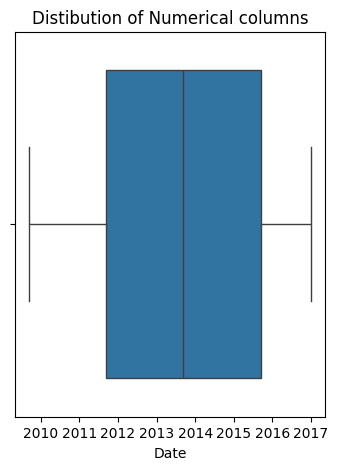

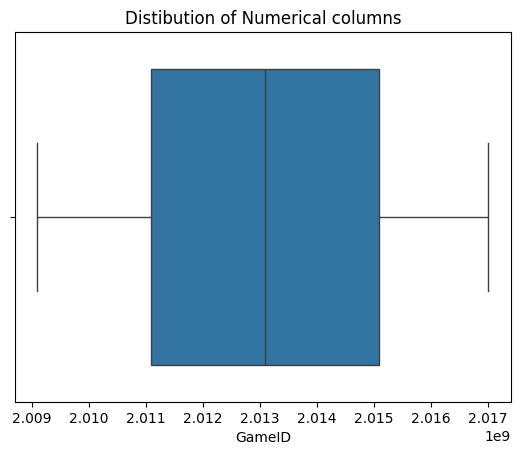

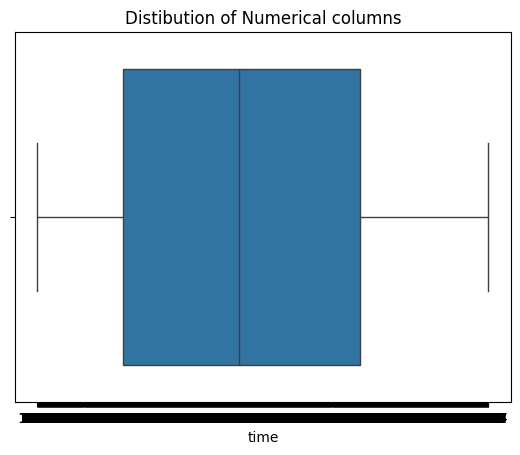

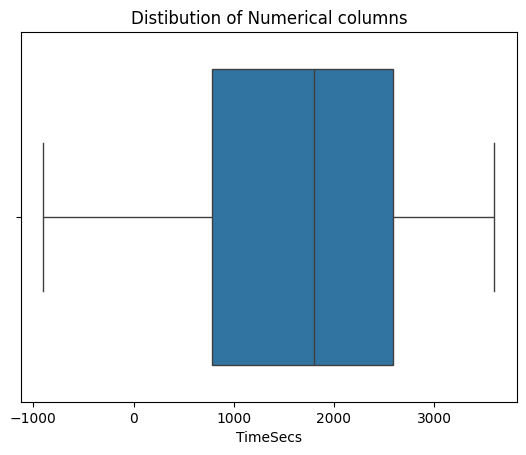

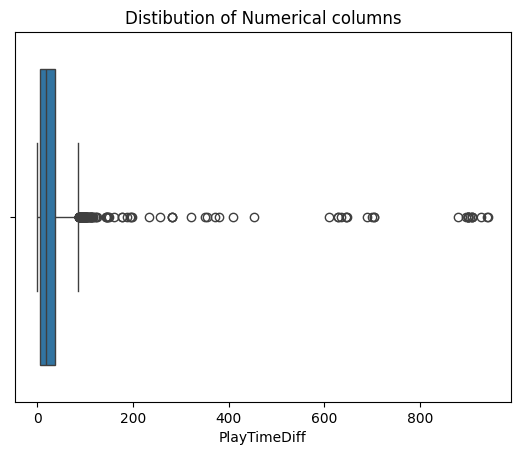

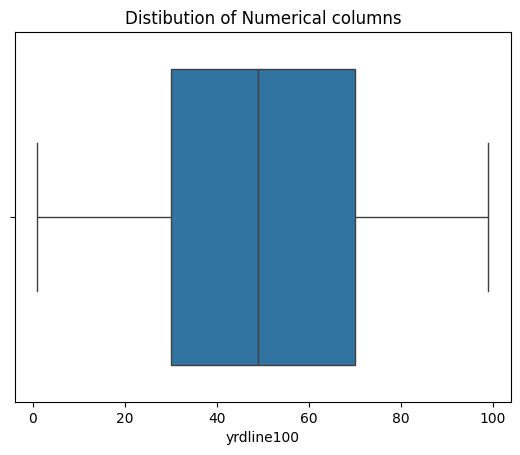

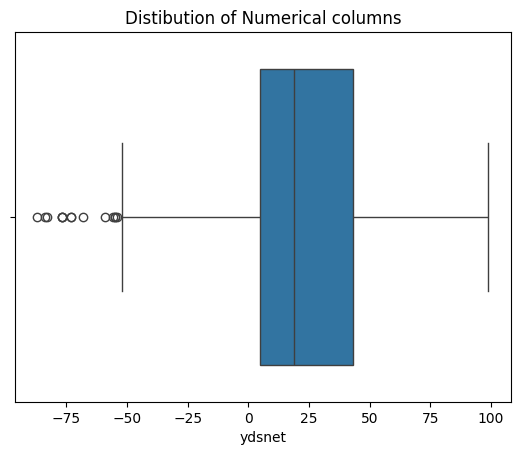

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023E319E02C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023E6FA8C180> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [37]:
plt.figure(figsize=[4,5])
for cols in num_col:
    sns.boxplot(x=df[cols])
    plt.title("Distibution of Numerical columns")
    plt.show()

In [42]:
game_id_value_count= df['GameID'].value_counts()
print(game_id_value_count)

GameID
2011120406    272
2016112709    232
2016103000    231
2012112200    229
2013112403    229
             ... 
2015092705    146
2012110100    146
2009122706    145
2013090801    145
2013120806    125
Name: count, Length: 2048, dtype: int64


In [45]:
filtered_rows=df[df['GameID']==2011100202]
print(filtered_rows[['HomeTeam','AwayTeam','Home_WP_post','PosTeamScore','DefTeamScore','WPA','ScoreDiff','Season','Win_Prob','ScoreDiff']])

      HomeTeam AwayTeam  Home_WP_post  PosTeamScore  DefTeamScore       WPA  \
99227      HOU      PIT      0.443747           0.0           0.0 -0.041928   
99228      HOU      PIT      0.432536           0.0           0.0 -0.011211   
99229      HOU      PIT      0.485955           0.0           0.0  0.053419   
99230      HOU      PIT      0.463515           0.0           0.0 -0.022440   
99231      HOU      PIT      0.507461           0.0           0.0  0.043946   
...        ...      ...           ...           ...           ...       ...   
99378      HOU      PIT      0.975554          10.0          17.0  0.004011   
99379      HOU      PIT      0.974167          10.0          17.0  0.001387   
99380      HOU      PIT      0.948017          10.0          17.0  0.026150   
99381      HOU      PIT      1.000000          17.0          10.0  0.051983   
99382      HOU      PIT      1.000000           NaN           NaN  0.000000   

       ScoreDiff  Season  Win_Prob  ScoreDiff  
992

In [47]:
columns_to_keep=['GameID','Date','HomeTeam','AwayTeam','Home_WP_post','PosTeamScore','DefTeamScore','WPA','ScoreDiff','Season','Win_Prob']
final_scores=df.groupby('GameID')[columns_to_keep].tail(1)

In [48]:
final_scores

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
177,2009091000,2009-09-10,PIT,TEN,NaN,10.0,10.0,NaN,0.0,2009,9.555270e-01
349,2009091304,2009-09-13,CLE,MIN,0.0,NaN,NaN,0.0,15.0,2009,4.373296e-11
531,2009091307,2009-09-13,NO,DET,1.0,NaN,NaN,0.0,19.0,2009,2.220446e-16
702,2009091308,2009-09-13,TB,DAL,0.0,NaN,NaN,0.0,13.0,2009,3.281873e-08
865,2009091305,2009-09-13,HOU,NYJ,0.0,NaN,NaN,0.0,18.0,2009,2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...
361723,2017010112,2017-01-01,DEN,OAK,1.0,NaN,NaN,0.0,18.0,2016,2.220446e-16
361889,2017010111,2017-01-01,WAS,NYG,NaN,10.0,13.0,NaN,-3.0,2016,8.348558e-02
362062,2017010115,2017-01-01,SF,SEA,0.0,NaN,NaN,0.0,2.0,2016,9.941040e-01
362256,2017010100,2017-01-01,ATL,NO,1.0,NaN,NaN,0.0,6.0,2016,9.949601e-01


In [49]:
final_scores.head()

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
177,2009091000,2009-09-10,PIT,TEN,NaN,10.0,10.0,NaN,0.0,2009,9.555270e-01
349,2009091304,2009-09-13,CLE,MIN,0.0,NaN,NaN,0.0,15.0,2009,4.373296e-11
531,2009091307,2009-09-13,NO,DET,1.0,NaN,NaN,0.0,19.0,2009,2.220446e-16
702,2009091308,2009-09-13,TB,DAL,0.0,NaN,NaN,0.0,13.0,2009,3.281873e-08
865,2009091305,2009-09-13,HOU,NYJ,0.0,NaN,NaN,0.0,18.0,2009,2.220446e-16
